In [1]:
consumer_key = 'zU1yXwbsjkfxNsWU742IB6eTU'
consumer_secret = 'zzfPdfREx4YzK0qnCkBFGeRcXsdP9VbXw9ePgoGeffMT3RgDEa'
access_token = '988401472009392129-7Gu5wYpeVe2xw0alIy4DRPD8WZJap07'
access_secret = '3fBhHgLDWDk16B2qXkLzgaWFf7RJdnnP72wLtFlXk8l4o'

In [2]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests

<b>Gather</b>

Download a file programmatically (image-predictions.tsv)

In [3]:
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv','wb') as file:
    file.write(r.content)

Read a csv file *"twitter-archive-enhanced.csv"*<br>
Extract tweet_id's for the next stage

In [4]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
tweet_id_all=twitter_archive['tweet_id']

Gather "retweet count" and "favorite_count" from Twitter using Tweepy by ID's.<br>
*ID's were taken from The WeRateDogs Twitter archive*

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Create an empty list, queried data will be stored in the list.<br>
*I chose a list because when we'll load the file, it will be converted to a DataFrame easily*

In [6]:
to_save=[]
for tweet_id in tweet_id_all:# tweet_id_all includes all tweet_id from twitter_enhanced csv
    one_query={}
    try: #create a dictionary {id:..., retweet_count:..., favorite_count:....}
        tweet=api.get_status(tweet_id, tweet_mode='extended')
        one_query['id']=tweet._json['id']
        one_query['retweet_count']=tweet._json['retweet_count']
        one_query['favorite_count']=tweet._json['favorite_count']
    except tweepy.TweepError:
        one_query['id']=tweet_id
        one_query['retweet_count']='failed'
        one_query['favorite_count']='failed'
    to_save.append(one_query) #add each dictionary to the list.
with open('tweet_json.txt','w') as file:    
    json.dump(to_save, file) #save the list of dictionaries to the tweet_json.txt

Rate limit reached. Sleeping for: 554
Rate limit reached. Sleeping for: 505


Open a json file and create a DataFrame

In [7]:
with open('tweet_json.txt','r') as file:
    json_data=json.load(file)
tweet_scores=pd.DataFrame(json_data) #load the file

In [8]:
tweet_scores.head()

,favorite_count,id,retweet_count
0,38920,892420643555336193,8628
1,33327,892177421306343426,6336
2,25107,891815181378084864,4208
3,42275,891689557279858688,8749
4,40435,891327558926688256,9508


In [9]:
#Change the order of columns. ID will become the first column.
tweet_scores = tweet_scores[['id', 'retweet_count','favorite_count']]
tweet_scores.head()

,id,retweet_count,favorite_count
0,892420643555336193,8628,38920
1,892177421306343426,6336,33327
2,891815181378084864,4208,25107
3,891689557279858688,8749,42275
4,891327558926688256,9508,40435


Download data of image predictions.

In [10]:
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t') #load the data of predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<b>Assess</b>

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The denominator should be 10.<br>

In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

The numerator should be between 1 and 14.<br>

In [14]:
twitter_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

Erroneous datatype. Required converting to datetime64.

In [15]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Buddy           7
Daisy           7
Toby            7
Bailey          7
Dave            6
Stanley         6
Koda            6
Oscar           6
Bella           6
Scout           6
Jax             6
Jack            6
Rusty           6
Leo             6
Milo            6
Chester         5
             ... 
Genevieve       1
Rorie           1
Beckham         1
Bloo            1
officially      1
Pepper          1
Banjo           1
Rhino           1
Jazz            1
Hazel           1
Stella          1
Cecil           1
Pinot           1
Stephanus       1
Skye            1
Tassy           1
Carll           1
Millie          1
Joey            1
Chuck           1
Cal             1
Naphaniel       1
Pete            1
Tonks           1
Timmy     

Invalid names such as "a", "an", "old", "infiriating", etc.

In [16]:
sum(twitter_archive.tweet_id.duplicated())

0

In [17]:
tweet_scores.favorite_count

0        38920
1        33327
2        25107
3        42275
4        40435
5        20279
6        11890
7        65757
8        27855
9        32037
10       30754
11       27871
12       48251
13       27264
14       15132
15       25392
16       29177
17       25683
18       19988
19      failed
20       21837
21       30297
22       46385
23       69342
24       33794
25       30649
26       35277
27       12106
28       22499
29       21187
         ...  
2326       450
2327       111
2328       168
2329       191
2330       785
2331       224
2332       301
2333       199
2334       513
2335       151
2336       178
2337       105
2338     14436
2339        80
2340       158
2341       166
2342       120
2343       326
2344       148
2345       480
2346       112
2347       298
2348       440
2349      1231
2350       133
2351       109
2352       301
2353       125
2354       131
2355      2561
Name: favorite_count, Length: 2356, dtype: object

19 values weren't received from Twitter.

In [18]:
twitter_archive[~twitter_archive.retweeted_status_id.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [19]:
sum(~twitter_archive['retweeted_status_id'].isnull())

181

181 tweet_id's are retweets

In [20]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

Invalid values for p1, p2, p3(dog breeds):<br>
coil, tick, revolver, binoculars, ping-pong_ball, electric_fan, giant_panda, maillot, bee_eater, suit, pillow, ocarina, bighorn, three-toed_sloth, basketball, bald_eagle, lawn_mower, conch, shopping_ basket, scorpion, bonnet, pool_table, carton, bearskin, piggy_bank, leaf_beetle, lacewing, ibex, seat_belt, web_site, tennis_ball, dingo, doormat, Siamese_cat, bath_towel, hamster, swing, tub, ice_bear, car_mirror, llama, redbone, home_theater, ox, Newfoundland, Lhasa, shopping_cart, porcupine, minivan, hippopotamus, brown_bear, goose, bow_tie, wombat, barrow, hog, patio, guinea_pig, Arctic_fox, bluetick, jigsaw_puzzle, bathtub, mousetrap, ram, cairn, wood_rabbit, white_wolf, prison, Arabian_camel, motor_scooter, refrigerator, vacuum, cowboy_hat, washbasin, toilet_tissue, seashore, common_iguana, space_heater, sea_lion, ski_mask, window_shade, Christmas_stocking, jack-o'-lantern, Leonberg, muzzle, stone_wall, comic_book, balloon, triceratops, dishwasher, dough, paper_towel, hen, gondola, frilled_lizard, sorrel, weasel, leatherback_turtle, birdhouse, tusker, wallaby, upright, dogsled, hermit_crab, paddle, lakeside, gas_pump, bustard, koala, toyshop, badger, snorkel, Loafer, Angora, shower_curtain, cash_machine, box-turtle, Appenzeller, ostrich, acorn_squash, snail, geyser, bubble, laptop, jellyfish, chimpanzee, axolotl, feather_boa, wool, hyena, street_sign, meerket, bannister, barbell, four-poster, sandbar, Madagaskar_cat, minibus, handkerchief, rain_barrel, trombone, walking_stick, ice_lolly, grey_fox, mud_turtle, banana, loupe, starfish, expresso, black-footed_ferret, radio_telescope, cuirass, syringe, marmot, African_grey, bib, cheeseburger, cheetah, studio_couch, envelope and so on.

In [21]:
sum(image_predictions.jpg_url.duplicated())

66

66 duplicated url, that means 2 different tweet_id have the same tweet_id and different jpg_url

In [22]:
image_predictions[image_predictions.jpg_url.duplicated()].jpg_url #duplicates
image_predictions[image_predictions.jpg_url=='https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.16593,True,Chesapeake_Bay_retriever,0.118199,True
1487,782021823840026624,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.16593,True,Chesapeake_Bay_retriever,0.118199,True


In [23]:
sum(image_predictions.tweet_id.duplicated())

0

In [24]:
twitter_archive[twitter_archive.tweet_id==782021823840026624] 
# tweet_id from the previous section, 
#as expected these 2 id(707610948723478529, 82021823840026624)
# duplicates, one is true(which doesn't have 'retweeted_status_user_id') 
#and the second is retweeted.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
728,782021823840026624,NaN,NaN,2016-10-01 00:58:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,7.076109e+17,4.196984e+09,2016-03-09 16:56:11 +0000,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,None,None,None,None


In [25]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Change the type of p1,p2,p3 to categorical.<br>

In [26]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Change the type of doggom floofer, pupper, puppo to categorical

#### Quality
##### `twitter_archive` table
- The denominator should be 10
- The numerator should be between 1 and 14
- Invalid names such as "a", "an", "old", "infiriating", etc.
- Split "text" column into 2 columns: original "text" and extracted url "quick_url"
- tweet_id's with in_reply_to_status_id are just replies to tweets(we'll remove these rows)
- remove rows with "retweeted_status_id", they are retweets.
- remove tweets without expanded_urls
- remove empty columns(retweeted_status_id, etc)
- convert doggo, floofer, pupper, puppo to categorical.
- Erroneous datatype: timestamp, tweet_id.
- Some numerators are float but the data includes only integers.
- *<b>optional</b>* we could convert numerator_rating/denominator ratings to categorical as we won't perform any mathematical operations with them.


##### `image_predictions` table
- Invalid values for p1, p2, p3(dog breeds) such scorpion, shopping backed etc.
- Change the type of p1,p2,p3 to categorical.
- 66 duplicated image url 


##### `tweet_scores` table
- 19 values weren't received from Twitter. 

#### Tidiness
- Convert doggo, floofer, pupper, puppo into one column "stage" in `twitter_archive table`.
- Join 2 tables(tweet_scores, image_predictions) into a table contains retweet_count, favorite_count, image predictions.

<b>Clean</b>

In [27]:
twitter_archive_clean=twitter_archive.copy() #creating copy of each data set.
image_predictions_clean=image_predictions.copy()
tweet_scores_clean=tweet_scores.copy()

<b>Define</b>

Keep the data for only ratings with denominators equal to 10.

<b>Code</b>

In [28]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.rating_denominator==10]

<b>Test</b>

In [29]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<b>Define</b>

According to their rating system, the max rating is 14/10.<br>
Remove rows where rating greater than 14.

<b>Code</b>

In [30]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.rating_numerator<15]

<b>Test</b>

In [31]:
twitter_archive_clean[twitter_archive_clean.rating_denominator > 14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<b>Define</b>

Find incorrect names and replace them with None.

<b>Code</b>

In [32]:
names=twitter_archive_clean.name.unique() # "names" contains all dog names
incorrect_names=[]
for name in names: #check if a name is lowercase, a name will be added to the "incorrect names"
    if name.islower()==True:
        incorrect_names.append(name)

def convert_names(name):
    #if a name in incorrect_names, a name will be replaced with "None"
    if name in incorrect_names:
        return "None"
    return name
#apply the fucntion convert_names to 'name' column.
twitter_archive_clean['name']=twitter_archive_clean['name'].apply(convert_names)

<b>Test</b>

In [33]:
sum(twitter_archive_clean['name'].value_counts().isin(incorrect_names))

0

<b>Define</b>

Split "text" column into 2 columns: original "text" and extracted url "quick_url"

<b>Code</b>

In [34]:
twitter_archive_clean['quick_url'] = twitter_archive_clean.text.str.extract('(https.+)', expand=True)
#extract urls from the texts

<b>Test</b>

In [35]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quick_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


<b>Define</b>

tweet_id's with in_reply_to_status_id are just replies to tweets<br>
Remove these rows.

<b>Code</b>

In [36]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

<b>Test</b>

In [37]:
twitter_archive_clean[~twitter_archive_clean['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quick_url


<b>Define</b>

Remove rows with "retweeted_status_id", they are retweets.

<b>Code</b>

In [38]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

<b>Test</b>

In [39]:
twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quick_url


<b>Define</b>

3 missing values of expanded urls(2072 instead of 2075)

In [40]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quick_url
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,NaN
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None,NaN
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None,NaN


These tweet_id not the true tweets, no images, just notification about something.<br>
Remove these lines.

<b>Code</b>

In [41]:
twitter_archive_clean=twitter_archive_clean[~twitter_archive_clean.expanded_urls.isnull()]

<b>Test</b>

In [42]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quick_url


<b>Define</b>

Convert 'doggo', 'floofer', 'pupper', 'puppo' to categorical.

<b>Code</b>

In [43]:
twitter_archive_clean.doggo=twitter_archive_clean.doggo.astype('category')
twitter_archive_clean.floofer=twitter_archive_clean.floofer.astype('category')
twitter_archive_clean.pupper=twitter_archive_clean.pupper.astype('category')
twitter_archive_clean.puppo=twitter_archive_clean.puppo.astype('category')

<b>Test</b>

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2072 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null category
floofer                       2072 non-null category
pupper                        2072 non-null category
puppo                         2072 non-null category
quick_url                     20

<b>Define</b>

Convert timestamp to datetime

<b>Code</b>

In [45]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

<b>Test</b>

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2072 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2072 non-null datetime64[ns]
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null category
floofer                       2072 non-null category
pupper                        2072 non-null category
puppo                         2072 non-null category
quick_url               

<b>Define</b>

Remove empty columns.

<b>Code</b>

In [47]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                                   'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

<b>Test</b>

In [48]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quick_url
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


<b>Define</b>

Change invalid values for p1, p2, p3(dog breeds) such scorpion, shopping backed etc.

Unfortunately, there is no pattern to determine incorrect values of dog breeds, only manualy.

<b>Code</b>

In [49]:
image_predictions_clean.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [50]:
incorrect_breeds=['coil', 'tick', 'revolver', 'binoculars', 'ping-pong_ball', 'electric_fan',
                  'giant_panda', 'maillot', 'bee_eater', 'suit', 'pillow', 'ocarina', 'bighorn',
                  'three-toed_sloth', 'basketball', 'bald_eagle', 'lawnmower', 'conch', 
                  'shopping basket', 'scorpion', 'bonnet', 'pool_table', 'carton', 'bearskin',
                  'piggy_bank', 'leaf_beetle', 'lacewing', 'ibex', 'seat_belt', 'web_site',
                  'tennis_ball', 'dingo', 'doormat', 'Siamese_cat', 'bath_towel', 'hamster',
                  'swing', 'tub', 'ice_bear', 'car_mirror', 'llama', 'redbone', 'home_theater',
                  'ox', 'Newfoundland', 'Lhasa', 'shopping_cart', 'porcupine', 'minivan',
                  'hippopotamus', 'brown_bear', 'goose, bow_tie', 'wombat', 'barrow', 'hog',
                  'patio', 'guinea_pig', 'Arctic_fox', 'bluetick', 'jigsaw_puzzle', 'bathtub',
                  'mousetrap', 'ram', 'cairn', 'wood_rabbit', 'white_wolf', 'prison',
                  'Arabian_camel', 'motor_scooter', 'refrigerator', 'vacuum', 'cowboy_hat',
                  'washbasin', 'toilet_tissue', 'seashore', 'common_iguana', 'space_heater',
                  'sea_lion', 'ski_mask', 'window_shade', 'Christmas_stocking', "jack-o'-lantern",
                  'Leonberg', 'muzzle', 'stone_wall', 'comic_book', 'balloon', 'triceratops',
                  'dishwasher', 'dough', 'paper_towel', 'hen', 'gondola', 'frilled_lizard',
                  'sorrel', 'weasel', 'leatherback_turtle', 'birdhouse', 'tusker', 'wallaby',
                  'upright', 'dogsled', 'hermit_crab', 'paddle', 'lakeside', 'gas_pump', 'bustard',
                  'koala', 'toyshop', 'badger', 'snorkel', 'Loafer', 'Angora', 'shower_curtain',
                  'cash_machine', 'box-turtle', 'Appenzeller', 'ostrich', 'acorn_squash', 'snail', 'geyser',
                  'bubble', 'laptop', 'jellyfish', 'chimpanzee', 'axolotl', 'feather_boa', 'wool', 'hyena', 
                  'street_sign', 'meerket', 'bannister', 'barbell', 'four-poster', 'sandbar', 
                  'Madagaskar_cat', 'minibus', 'handkerchief', 'rain_barrel', 'trombone', 
                  'walking_stick', 'ice_lolly', 'grey_fox', 'mud_turtle', 'banana', 'loupe', 
                  'starfish', 'expresso', 'black-footed_ferret', 'radio_telescope', 'cuirass', 
                  'syringe', 'marmot', 'African_grey', 'bib', 'cheeseburger', 'cheetah', 
                  'studio_couch', 'envelope','cougar','coral_reef','convertible','coho',
                  'coffee_mug','guenon','hammer','hand_blower','mortarboard', 'lion', 
                  'military_uniform','microwave','microphone','maze','mailbox','lynx',
                  'lorikeet','long-horned_beetle','limousine','hare','leopard','lawn_mower',
                 'king_penguin','killer_whale','jersey','hummingbird','hotdog','hay','harp',
                 'damselfly','terrapin','shopping_basket','canoe', 'beach_wagon', 'standard_schnauzer',
                  'remote_control','earthstar','African_hunting_dog','espresso','alp','African_crocodile',
                  'trafiic_light','fire_engine','pencil_box','pot', 'rotisserie','grille','restaurant',
                  'china_cabinet','fiddler_crab','pole','water_buffalo','agama','flamingo','clumber',
                  'pedestal','sundial', 'padlock', 'quilt', 'bakery',
                   'bookcase', 'shield', 'school_bus', 'cowboy_boot', 'wooden_spoon',
                    'teapot', 'washer', 'fountain', 'tricycle', 'orange','American_black_bear',
                   'skunk', 'bookshop', 'Madagascar_cat', 'tabby', 'sundial', 'padlock', 'quilt', 'bakery',
                   'bookcase', 'shield', 'school_bus', 'cowboy_boot', 'wooden_spoon',
                   'teapot', 'washer', 'fountain', 'tricycle', 'orange', 'American_black_bear',
                   'skunk', 'bookshop', 'Madagascar_cat', 'tabby','sunglasses', 'rapeseed',
                   'traffic_light', 'tiger_shark', 'sulphur-crested_cockatoo','tailed_frog', 'otter', 'Egyptian_cat',
                   'wild_boar', 'timber_wolf', 'meerkat', 'nail', 'polecat', 'cup',
                   'cliff','beaver','dining_table', 'snowbile','bison','crane',
                  'clog', 'sliding_door','carousel','panpipe','book_jacket',
                  'bow', 'stove', 'slug', 'robin','water_bottle', 'toilet_seat',
                  'pitcher', 'picket_fence', 'zebra','park_bench', 'prayer_rug','Pembroke',
                    'swab', 'goose', 'borzoi', 'beagle','crash_helmet','candle', 
                  'platypus', 'sea_urchin', 'bow_tie', 'peacock',
                  'dhole','snowmobile','soccer_ball','boathouse','desktop_computer','box_turtle',
                 ]
def change_incorrect_value(prediction_value):
    #check whether or not a prediction value is correct or not
    if prediction_value in incorrect_breeds:
        return "None"
    return prediction_value
#applying the function to p1,p2,p3
image_predictions_clean['p1']=image_predictions_clean['p1'].apply(change_incorrect_value)
image_predictions_clean['p2']=image_predictions_clean['p2'].apply(change_incorrect_value)
image_predictions_clean['p3']=image_predictions_clean['p3'].apply(change_incorrect_value)

In [51]:
len(incorrect_breeds)

306

<b>Test</b>

In [52]:
image_predictions_clean.p1.value_counts()

None                           671
golden_retriever               150
Labrador_retriever             100
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
malamute                        30
cocker_spaniel                  30
French_bulldog                  26
miniature_pinscher              23
Chesapeake_Bay_retriever        23
Staffordshire_bullterrier       20
German_shepherd                 20
Siberian_husky                  20
Cardigan                        19
Shetland_sheepdog               18
Eskimo_dog                      18
Maltese_dog                     18
teddy                           18
Lakeland_terrier                17
Rottweiler                      17
Shih-Tzu                        17
kuvasz                          16
Italian_greyhound               16
Great_Pyrenees                  14
West_Highland_white_

<b>Define</b>

Change p1,p2,p3 to categorical

<b>Code</b>

In [53]:
image_predictions_clean.p1=image_predictions_clean.p1.astype('category')
image_predictions_clean.p2=image_predictions_clean.p2.astype('category')
image_predictions_clean.p3=image_predictions_clean.p3.astype('category')

<b>Test</b>

In [54]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 143.4+ KB


<b>Define</b>

66 duplicated image url.<br>
Remove duplicates.

<b>Code</b>

Firstly check these duplicates.

In [55]:
image_predictions_clean[image_predictions_clean.jpg_url.duplicated()].jpg_url
#check all duplicated jpg_url from the image predictions data set

1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
1364    https://pbs.twimg.com/tweet_video_thumb/CeBym7...
1368      https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg
1387      https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg
1407      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1417      https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
1427      https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg
1446      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1453      https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg
1456      https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg
1463      https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg
1476      https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg
1487      https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg
1495      http

Randomly take a sample.

In [56]:
image_predictions_clean[image_predictions_clean.jpg_url=='https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg']
#check the value, in order to determine which is a duplicate.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True


In [57]:
retweets=twitter_archive[~twitter_archive.retweeted_status_id.isnull()].tweet_id.values
#Keep in mind twitter_archive is original. Our twitter_archive_clean hasn't already had these
#duplicates.

In [58]:
741067306818797568 in retweets 

False

In [59]:
770093767776997377 in retweets

True

As expected, the duplicates in image_predictions are retweets.<br>
Remove these duplicates from the image_predictions

In [60]:
image_predictions_clean=image_predictions_clean[~image_predictions_clean['tweet_id'].isin(retweets)]
#removed duplicates, we used retweets from the twitter_archive data set.

<b>Test</b>

In [61]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1994 non-null int64
jpg_url     1994 non-null object
img_num     1994 non-null int64
p1          1994 non-null category
p1_conf     1994 non-null float64
p1_dog      1994 non-null bool
p2          1994 non-null category
p2_conf     1994 non-null float64
p2_dog      1994 non-null bool
p3          1994 non-null category
p3_conf     1994 non-null float64
p3_dog      1994 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 154.4+ KB


<b>Define</b>

Remove rows without retweet_count/favorite_count.

<b>Code</b>

In [62]:
tweet_scores_clean=tweet_scores_clean[tweet_scores_clean.retweet_count!='failed']

<b>Test</b>

In [63]:
tweet_scores_clean[tweet_scores_clean.retweet_count=='failed']

,id,retweet_count,favorite_count


<b>Tidy data</b>

<b>Define</b>

Convert 3 columns: doggo, floofer, pupper, puppo into column: "stage".

<b>Code</b>

In [64]:
twitter_archive_clean['stage']=twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

In [65]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,quick_url,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN


<b>Define</b>

Change stage to categorical

<b>Code</b>

In [66]:
twitter_archive_clean.stage=twitter_archive_clean.stage.astype('category')

<b>Test</b>

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
quick_url             2072 non-null object
stage                 345 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 164.1+ KB


The final step is to join 2 tables.

<b>Define</b>

Merge image_predictions and tweet_scores.

<b>Code</b>

In [68]:
tweet_scores_clean.rename(columns={"id": "tweet_id"},inplace=True)

In [69]:
prediction_and_counts=image_predictions_clean.merge(tweet_scores_clean, how='left',on='tweet_id')

<b>Test</b>

In [70]:
prediction_and_counts.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,520,2561
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,None,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,47,131
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,44,125
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,None,0.360687,True,miniature_pinscher,0.222752,True,141,301
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,40,109


<b>Define</b>

Extract rating numerators(including floats)

<b>Code</b>

In [71]:
#extract the whole rating, e.g 12.75/10 
extracted_rating=twitter_archive_clean.text.str.extract('([0-9]+\.?[0-9]*/[0-9]+)', expand=False)
#extract the numerator, e.g 12.75
extracted_numerator=extracted_rating.apply(lambda x: x.split('/')[0])
#update column values in the data
twitter_archive_clean['rating_numerator']=extracted_numerator

<b>Test</b>

In [72]:
twitter_archive_clean[twitter_archive_clean.tweet_id==883482846933004288]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,quick_url,stage
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,https://t.co/qjrljjt948,NaN


<b>Define</b>

Merge twitter_archive_cleand and prediction_and_counts by tweet_id

<b>Code</b>

In [73]:
twitter_archive_master=prediction_and_counts.merge(twitter_archive_clean, how='inner',on='tweet_id')

<b>Test</b>

In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 23 columns):
tweet_id              1949 non-null int64
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1949 non-null category
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
p2                    1949 non-null category
p2_conf               1949 non-null float64
p2_dog                1949 non-null bool
p3                    1949 non-null category
p3_conf               1949 non-null float64
p3_dog                1949 non-null bool
retweet_count         1949 non-null object
favorite_count        1949 non-null object
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null object
rating_denominator    1949 non-null int64
name                  194

<b>Define</b>

Convert tweet_id's type to strings

<b>Code</b>

In [75]:
twitter_archive_master.tweet_id=twitter_archive_master.tweet_id.astype('str')

<b>Test</b>

In [76]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 23 columns):
tweet_id              1949 non-null object
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1949 non-null category
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
p2                    1949 non-null category
p2_conf               1949 non-null float64
p2_dog                1949 non-null bool
p3                    1949 non-null category
p3_conf               1949 non-null float64
p3_dog                1949 non-null bool
retweet_count         1949 non-null object
favorite_count        1949 non-null object
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null object
rating_denominator    1949 non-null int64
name                  19

In [78]:
twitter_archive_master=twitter_archive_master.replace('None', np.NaN)
twitter_archive_master.rating_numerator=twitter_archive_master.rating_numerator.astype(float)
twitter_archive_master.retweet_count=twitter_archive_master.retweet_count.astype('int64')
twitter_archive_master.favorite_count=twitter_archive_master.favorite_count.astype('int64')

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 23 columns):
tweet_id              1949 non-null object
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1321 non-null category
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
p2                    1541 non-null category
p2_conf               1949 non-null float64
p2_dog                1949 non-null bool
p3                    1499 non-null category
p3_conf               1949 non-null float64
p3_dog                1949 non-null bool
retweet_count         1949 non-null int64
favorite_count        1949 non-null int64
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null float64
rating_denominator    1949 non-null int64
name                  134

<b>Store the data sets.</b>

In [80]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

<b>Analyzing, visualizing Data</b>

In [81]:
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,quick_url,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2561,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,https://t.co/BLDqew2Ijj,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,NaN,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,131,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,https://t.co/r7mOb2m0UI,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,125,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,https://t.co/y671yMhoiR,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,NaN,0.360687,True,miniature_pinscher,...,301,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,https://t.co/DWnyCjf2mx,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,109,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,https://t.co/4B7cOc1EDq,NaN


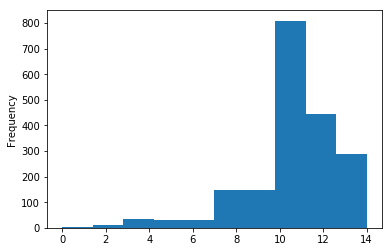

In [86]:
twitter_archive_master.rating_numerator.plot(kind='hist');

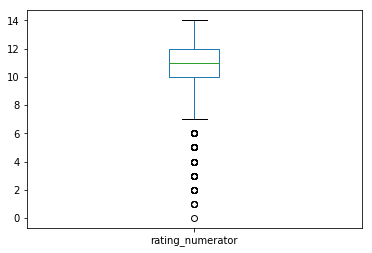

In [83]:
twitter_archive_master.rating_numerator.plot(kind='box');

The distribution of ratings is left_skewed. Most of the tweets receive ratings between 10 and 12. The median is 10, there are some outliers, who receive ratings less than 6.

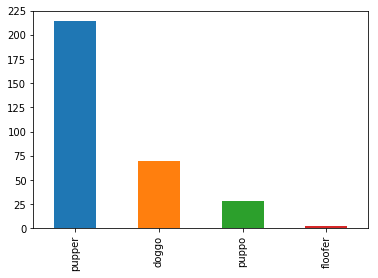

In [84]:
twitter_archive_master.stage.value_counts().plot(kind='bar');

There are more than 200 puppers in the data set. We have to keep in mind that the data have only ~350 observations of a dog stage. "Pupper" is usually younger than "doggo" and "puppo" between these 2 stages. "Floofer" could be any dog, really. So, let's stick to these 3 stages: doggo, puppo, pupper.

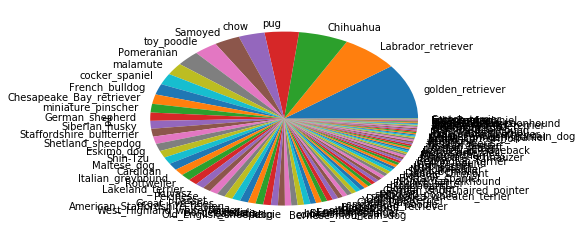

In [85]:
#select p1_dog true predictions
p1_true=twitter_archive_master[twitter_archive_master['p1_dog']==True]
p1_true.p1.value_counts().plot(kind='pie');

According the image predictions machine learning algorithm, the most common breeds are chihuahua, labrador retriever, golden_retriever, pug, chow. Thera a lot of noise because the data represent population rather than a sample, so approximately all possible breeds represent the data. 

### Summary

Further, we may investigate this data set, build a better machine learning algorithm, find out whether or not a correlation between dog stage and favorite/retweet counts exists or a correlation between ratings and dog breeds.

### Wrangling

Wrangling has 3 steps: gather, assess, clean. These steps can iterate as new tasks appear. You should gather additional data (in some cases you can't) if you don't have enough for your analysis. In my opinion, the hardest task is to ask right questions. When you assess data you have to find missing values, incorrect values, multiple representations (duplicates), sometimes you don't have data for some observations and you have to gather again. In this case, we don't have enough data such as: retweet count and favorite count. So, we gathered this data through Twitter API called Tweepy. We got required data but 19 observations have missing values. It happened because some tweets are deleted and we can't do anything.<br>
We saw that the data have incorrect(invalid) observations, in our case: retweets and replies to tweets. Fortunately, we can easy determine them by in_reply_to_status_id (replies) and retweeted_status_id (retweets). There was only one solution to this problem, as we were interested only in original tweets, we removed these observations. <br>
Another problem was that 3 observations don't have expanded urls, these observations don't have images,  only notifications about something. We removed these invalid values from the data.<br>
3 main problems of the data were: rating numerator, rating denominator and names of the dogs.<br>
Firstly, denominator, according to their rate rules, should be 10 but we saw a lot of observations which don't support that rule.<br>
Numerator should be less than 14, 14 is the highest rating. 
I checked all values with numerator greater than 14 and denominator not equal 10, all these observations have images where more than 1 dog or even a human(Snoop Dog), I decided to remove these rows as we can't compare them to the other tweets.<br> 
And the names have invalid values such as: 'a', 'an', 'old', etc.<br>
Some values we could find from the text of each observation but in most cases we just don't have the required data of dog names.<br>
Another problem was predictions of dog breeds. More than 300 values of prediction labels are incorrect. The problem was that there was no pattern of these incorrect values. So, you have to manually find these values. Of course, if you had access to the machine learning algorithm and change these values, it would be easy to handle the problem at the beginning.<br>
Another problem was duplicates in the image predictions. Tweet id's don't have duplicates but jpg_url's do. 66 duplicares of jpg_url's, so what does it mean? I checked these tweet id's of duplicates and found out that these duplicates had 'retweeted_status_id' from the first data set (twitter_archive), so, we removed these duplicates.<br>
Another issue was representation 2 variables in the same column. We extracted url from the text and created a new column 'quick_url'.<br>
We also created a new column 'stage' and remove 4 columns: doggo, puppo, floofer, pupper.<br>
At the end we created a new data set which contains image predictions and tweet scores. Of course, we could join 3 tables toghether, but in this case I decided to separate them.